In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
# Define a function that counts the number of links in a grid of an arrangement
def count_links(grid):
    m, n = grid.shape
    links = 0
    # Check horizontal pairs
    for i in range(m):
        for j in range(n-1):  # n-1 because we compare each pair in a row
            if abs(grid[i, j] - grid[i, j+1]) == 1:
                links += 1
    # Check vertical pairs
    for i in range(m-1):  # m-1 because we compare each pair in a column
        for j in range(n):
            if abs(grid[i, j] - grid[i+1, j]) == 1:
                links += 1
    return links

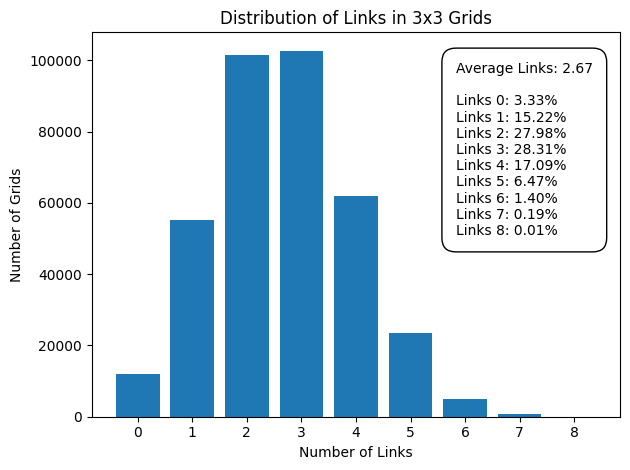

In [3]:
# Generate all possible 3x3 grids
all_grids = itertools.permutations(range(1, 10))
links_distribution = {}

total_grids = 0
total_links = 0

for grid in all_grids:
    # Convert the flat tuple into a 3x3 list and then to a NumPy array
    grid_array = np.array([list(grid[i:i+3]) for i in range(0, 9, 3)])
    # Count the links for the current grid
    num_links = count_links(grid_array)
    total_links += num_links
    total_grids += 1
    # Update the distribution
    links_distribution[num_links] = links_distribution.get(num_links, 0) + 1

# Calculate the average number of links
average_links = total_links / total_grids

# Calculate percentages and sort by link number
percentages = {k: (v / total_grids) * 100 for k, v in sorted(links_distribution.items())}

# Plot the distribution of links
plt.bar(links_distribution.keys(), links_distribution.values())
plt.xlabel('Number of Links')
plt.ylabel('Number of Grids')
plt.title('Distribution of Links in 3x3 Grids')

# Annotate with percentages and the average, sorted from 0 to 8 links
text_str = f'Average Links: {average_links:.2f}\n\n'
# Iterate through links 0 to 8 and compile text, avoiding extra newline on the last entry
link_text_lines = [f'Links {k}: {percentages.get(k, 0):.2f}%' for k in range(9)]  # 0 to 8
text_str += '\n'.join(link_text_lines)  # Join all lines with newline

# Positioning and styling the textbox
plt.figtext(0.72, 0.5, text_str, ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
plt.xticks(range(min(links_distribution.keys()), max(links_distribution.keys())+1))
plt.tight_layout()

plt.show()

In [4]:
# Define a function that generates m by n grids randomly 
def simulate(m=3, n=3, N=200000):
    np.random.seed(0)  # Ensure repeatable results
    
    total_links = 0  # Initialize total links count
    for _ in range(N):  # Run N simulations
        nums = np.random.permutation(m * n) + 1  # Fill grid with numbers 1 to m*n
        grid = nums.reshape(m, n)  # Shape into m by n grid
        total_links += count_links(grid)  # Add count of links in this grid to total
    
    return total_links / N  # Return average number of links

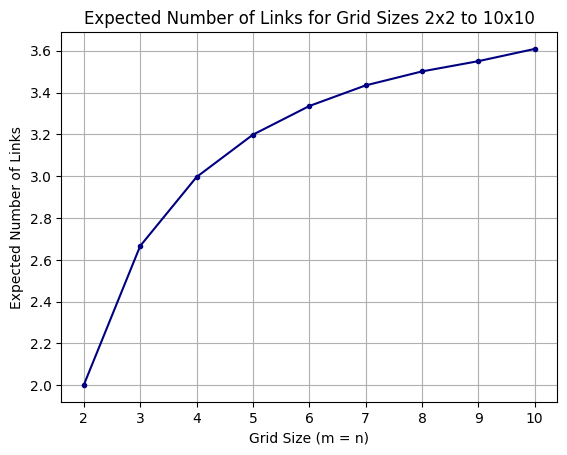

In [5]:
# Collect simulation results
grid_sizes = range(2, 11)
expected_links_results = [simulate(m=size, n=size) for size in grid_sizes]

# Plotting
plt.plot(grid_sizes, expected_links_results, marker='.', linestyle='-', color='navy')
plt.xlabel('Grid Size (m = n)')
plt.ylabel('Expected Number of Links')
plt.title('Expected Number of Links for Grid Sizes 2x2 to 10x10')
plt.xticks(grid_sizes)
plt.grid(True)
plt.show()

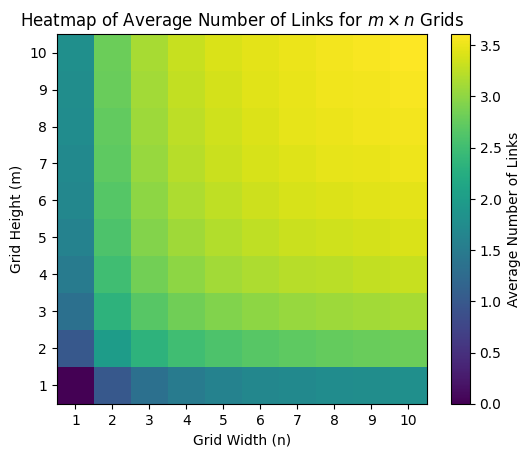

In [6]:
# Initialize an array to store the average number of links for each grid size
avg_links = np.zeros((10, 10))

# Calculate the average number of links for each grid size
for i in range(1, 11):
    for j in range(1, 11):
        avg_links[i-1, j-1] = simulate(i, j)

# Create a heatmap to visualize the average number of links
plt.imshow(avg_links, cmap='viridis', interpolation='nearest', origin='lower')
plt.colorbar(label='Average Number of Links')
plt.xticks(np.arange(10), np.arange(1, 11))
plt.yticks(np.arange(10), np.arange(1, 11))
plt.xlabel('Grid Width (n)')
plt.ylabel('Grid Height (m)')
plt.title('Heatmap of Average Number of Links for $m \\times n$ Grids')
plt.show()

In [7]:
# Define a function that generates random m by n grids with the number 1 at specific positions(nodes)
def simulate_with_fixed_1(m=3, n=3, N=100000, position=None):
    np.random.seed(0)  # For reproducibility
    total_links = 0
    for _ in range(N):
        nums = np.random.permutation(m * n) + 1  # Generate a shuffled array of numbers 1-m*n
        if position:
            one_index = np.where(nums == 1)[0][0]
            if position == 'center':
                center_index = (m * n) // 2
                nums[one_index], nums[center_index] = nums[center_index], nums[one_index]
            elif position == 'corner':
                nums[one_index], nums[0] = nums[0], nums[one_index]
            elif position == 'edge':
                # Choose a specific edge position for '1', or randomize as needed
                edge_positions = [1, n-2, n*(m-1), n*m-2]  # Adjust based on grid size
                selected_edge_position = edge_positions[0]  # Example: Top edge middle position
                nums[one_index], nums[selected_edge_position] = nums[selected_edge_position], nums[one_index]
        
        grid = nums.reshape(m, n)
        links = count_links(grid)
        total_links += links
    
    expected_links = total_links / N
    return expected_links

In [8]:
# Run simulations for 1 in the corner and 1 in the center
expected_links_center = simulate_with_fixed_1(position='center')
expected_links_corner = simulate_with_fixed_1(position='corner')
expected_links_edge = simulate_with_fixed_1(position='edge')

expected_links_center, expected_links_corner, expected_links_edge

(2.49447, 2.74454, 2.62758)

##### This result confirms the observation that position matters.